# Import Libraries and Datasets

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [21]:
data1.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


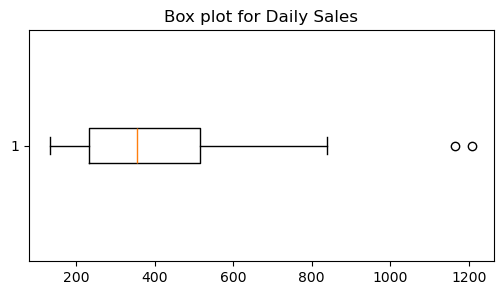

In [22]:
plt.figure(figsize=(6,3))
plt.title("Box plot for Daily Sales")
plt.boxplot(data1["daily"], vert = False)
plt.show()

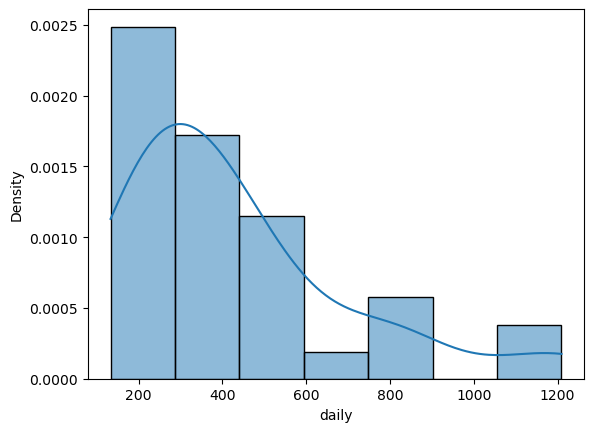

In [23]:
sns.histplot(data1['daily'], kde = True,stat='density',)
plt.show()

# Observations

##  

There are no missing values

The daily columns values appears to be right-skewd

The sunday column values also appear to be right skewed

Tere ae two outlier in both daily column and also in sunday column as observed from  the

In [26]:
# Scatter plot

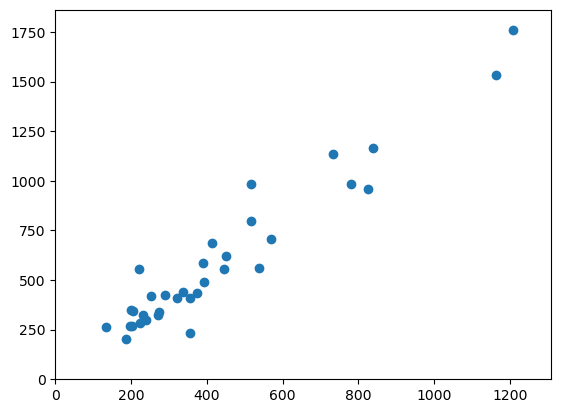

In [27]:
x = data1["daily"]
y = data1["sunday"]
plt.scatter(data1["daily"], data1["sunday"])
plt.xlim(0, max(x) + 100)
plt.ylim(0, max(y) + 100)
plt.show()

In [28]:
data1["daily"].corr(data1["sunday"])

0.9581543140785462

In [29]:
data1[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [30]:
data1.corr(numeric_only=True)

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


# Interpretation

R-squared = 1 ----> Perfect fit(all variance explained).

R-squared = 0 ----> Models does not explain any variance

R-squared close to 1 ---> Good model fit.

R squared close 0---> Poor model fit.

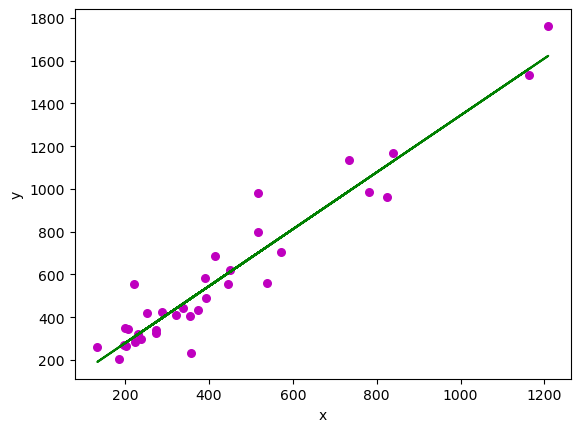

In [48]:
x = data1["daily"].values
y = data1["sunday"].values
plt.scatter(x,y, color = 'm', marker = "o", s = 30)
b0 = 13.84
b1 = 1.33
y_hat = b0 + b1*x

plt.plot(x,y_hat, color = "g")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Observations

The probability (p-value) for intercept(beta_0) is 0.707 > 0.05

Therefore the intercept coefficient may not be that much significant in prediction

However the p-value for "daily"(Beta_1) is 0.00< 0.05

Therefore the beta_1 coeffecient is highly significant and is contribution to prediction

In [38]:
model1.params

NameError: name 'model1' is not defined

In [39]:
print(f'model t-values:\n {model1.values}\n-------------------\nmodel p-values: \n{model1.pvalues})

SyntaxError: unterminated f-string literal (detected at line 1) (2189971313.py, line 1)

In [41]:
newdata=pd.Series([200,300,1500])
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300
2,1500


In [46]:
data1["Y_hat"] = data_pred
data1

NameError: name 'data_pred' is not defined

In [42]:
model1.predict(data_pred)

NameError: name 'model1' is not defined

In [43]:
pred = model1.predict(data1["daily"])
pred

NameError: name 'model1' is not defined

In [44]:
data1["Y_hat"] = pred
data1

NameError: name 'pred' is not defined

In [47]:
mse = np.mean((data1["daily"]-data1["Y_hat"])**2)
rmse = np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)

KeyError: 'Y_hat'

In [11]:
data1= pd.read_csv("NewspaperData.csv")
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Descriptive Statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


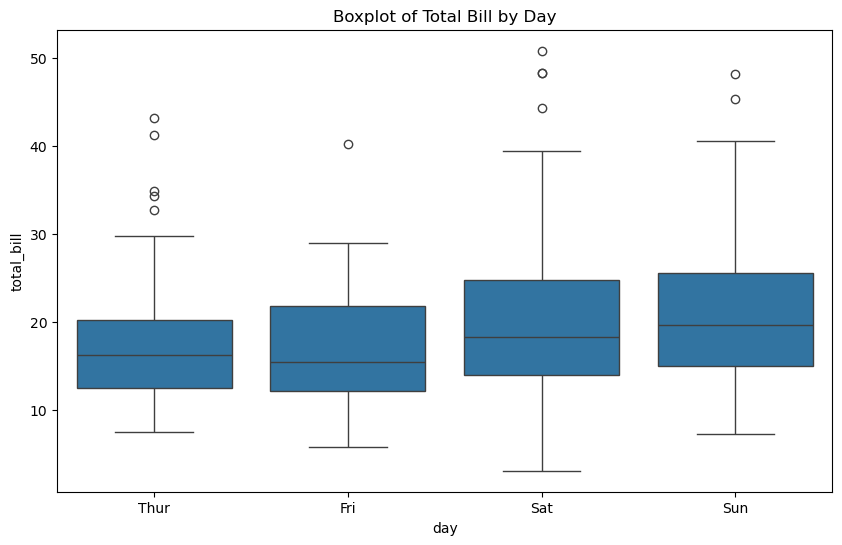

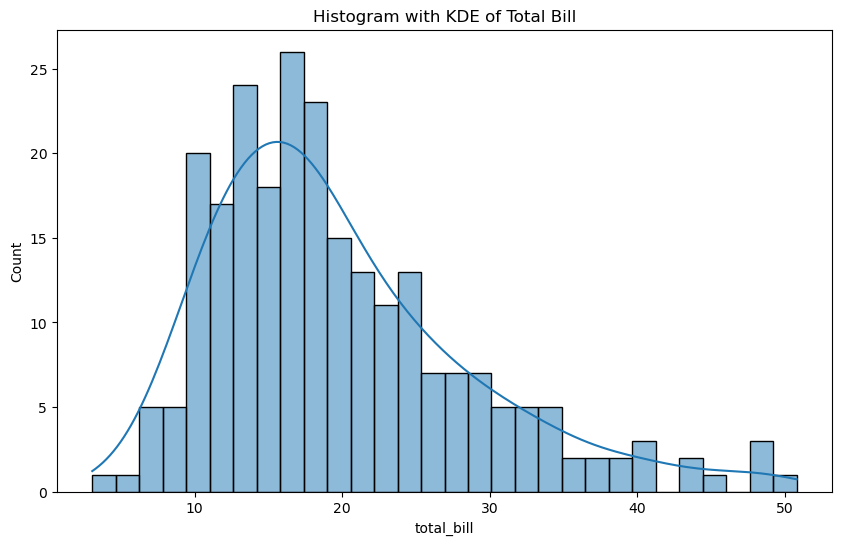

In [15]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load an example dataset (for instance, the 'tips' dataset from seaborn)
df = sns.load_dataset('tips')

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())

# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Create a boxplot to visualize the distribution of total_bill
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Boxplot of Total Bill by Day')
plt.show()

# Create a histogram with KDE for the 'total_bill' column
plt.figure(figsize=(10, 6))
sns.histplot(df['total_bill'], kde=True, bins=30)
plt.title('Histogram with KDE of Total Bill')
plt.show()


In [16]:
df.info()
data1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [17]:
df.describe()
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


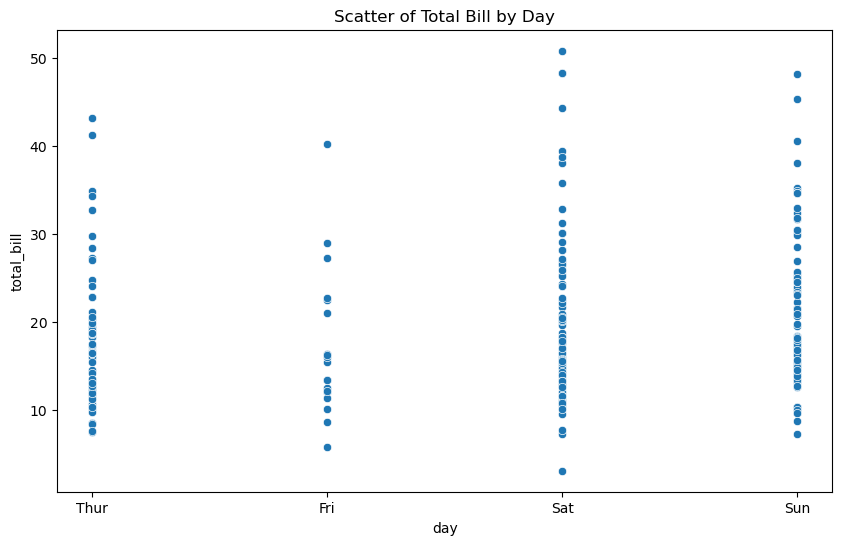

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='day', y='total_bill', data=df)
plt.title('Scatter of Total Bill by Day')
plt.show()